# T-SNE Visualization for the Embeddings of 1) NLP Baseline 2) KG Baseline 3) STonKGs

In [1]:
import ast
import getpass
import os
import sys
import time
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from stonkgs.constants import MISC_DIR

User/Version etc.

In [2]:
print(getpass.getuser())
print(sys.version)
print(time.asctime())

hbalabin
3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
Mon Jul  5 16:22:35 2021


# 1) KG

In [3]:
kg = pd.read_csv(os.path.join(MISC_DIR, 'kg_embeds_visualization_disease.tsv'), sep='\t')
kg_labels = kg['label'].to_list()

In [4]:
kg_embeds = []

for i in kg['embedding']:
    kg_embeds.append(ast.literal_eval(i))

In [5]:
X_kg_embedded = TSNE(n_components=2).fit_transform(kg_embeds)

In [6]:
kg_embedding_data = {}

for idx, l in enumerate(kg_labels):
    if l not in kg_embedding_data:
        kg_embedding_data[l] = []
    kg_embedding_data[l].append(X_kg_embedded[idx])

# 2) NLP

In [7]:
nlp = pd.read_csv(os.path.join(MISC_DIR, 'nlp_embeds_visualization_disease.tsv'), sep='\t')
nlp_labels = nlp['label'].to_list()

In [8]:
nlp_embeds = []

for i in nlp['embedding']:
    nlp_embeds.append(ast.literal_eval(i))

In [9]:
X_nlp_embedded = TSNE(n_components=2).fit_transform(nlp_embeds)

In [10]:
nlp_embedding_data = {}

for idx, l in enumerate(nlp_labels):
    if l not in nlp_embedding_data:
        nlp_embedding_data[l] = []
    nlp_embedding_data[l].append(X_nlp_embedded[idx])

# 3) STonKGs

In [11]:
ston_kg = pd.read_csv(os.path.join(MISC_DIR, 'stonkgs_embeds_visualization_disease.tsv'), sep='\t')
ston_labels = nlp['label'].to_list()

In [12]:
ston_embeds = []

for i in ston_kg['embedding']:
    ston_embeds.append(ast.literal_eval(i))

In [13]:
X_ston_embedded = TSNE(n_components=2).fit_transform(ston_embeds)

In [14]:
ston_embedding_data = {}

for idx, l in enumerate(ston_labels):
    if l not in ston_embedding_data:
        ston_embedding_data[l] = []
    ston_embedding_data[l].append(X_ston_embedded[idx])

In [15]:
from math import log

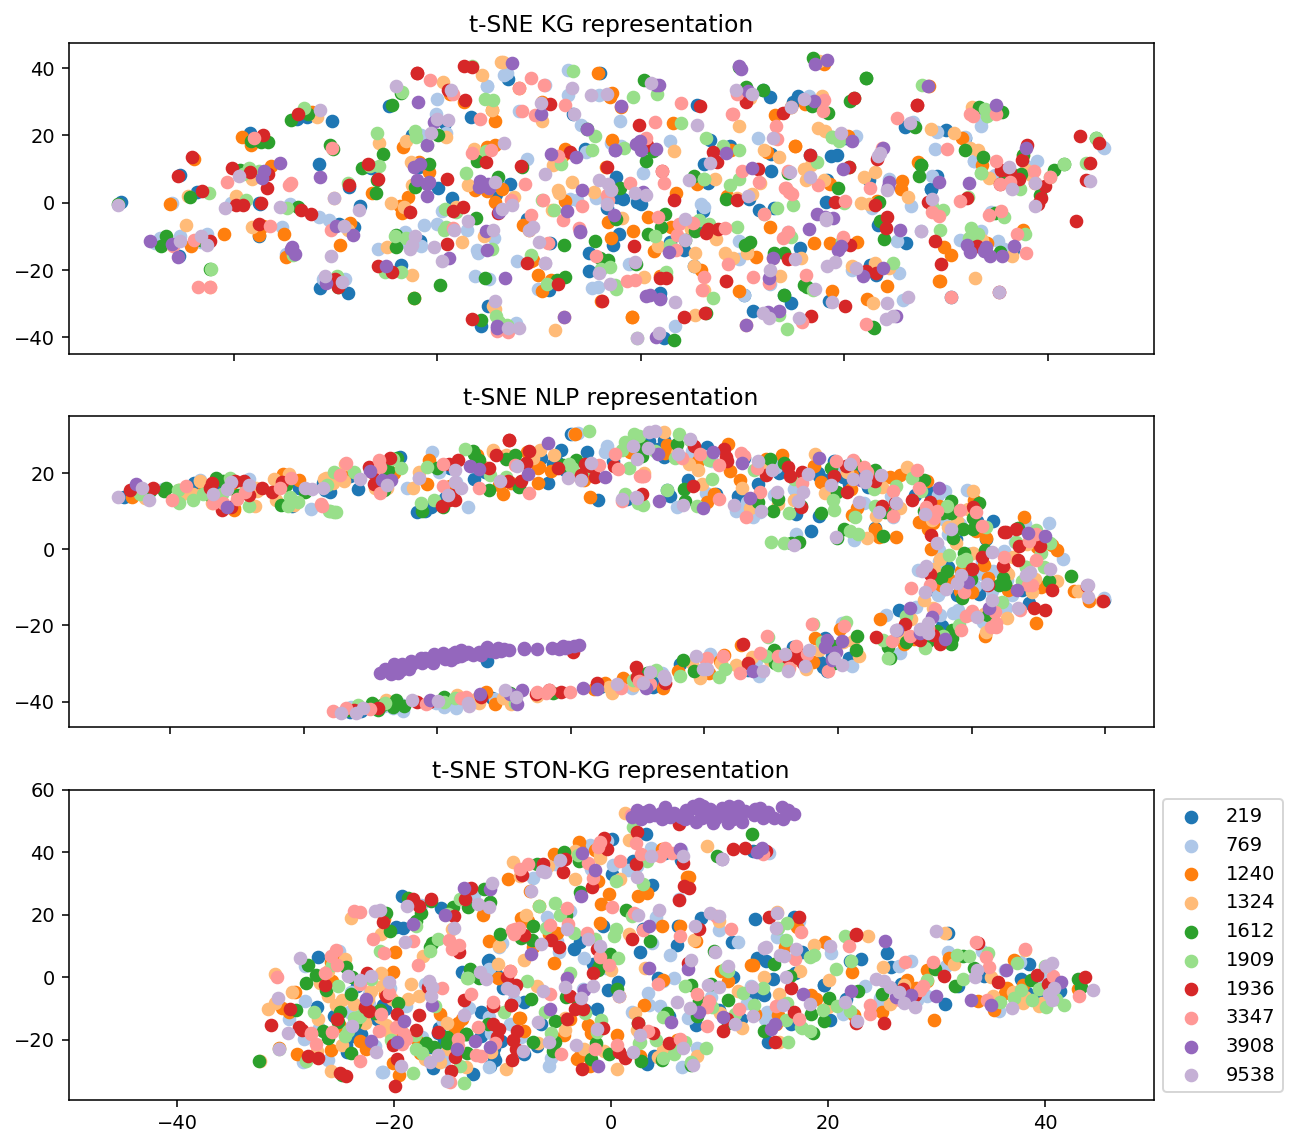

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), dpi=140)

cmap = plt.cm.get_cmap("tab20")

label_to_color_map = {}

for family, vector_list in kg_embedding_data.items():
    if family not in label_to_color_map:
        label_to_color_map[family] = cmap(len(label_to_color_map))

    x = []
    y = []
    for val in vector_list:
        x.append(val[0])
        y.append(val[1])

    axs[0].scatter(x, y, color=label_to_color_map[family], label=family)

for family, vector_list in nlp_embedding_data.items():
    if family not in label_to_color_map:
        label_to_color_map[family] = cmap(len(label_to_color_map))

    x = []
    y = []
    for val in vector_list:
        x.append(val[0])
        y.append(val[1])

    axs[1].scatter(x, y, color=label_to_color_map[family], label=family)
    
for family, vector_list in ston_embedding_data.items():
    if family not in label_to_color_map:
        label_to_color_map[family] = cmap(len(label_to_color_map))

    x = []
    y = []
    for val in vector_list:
        x.append(val[0])
        y.append(val[1])

    axs[2].scatter(x, y, color=label_to_color_map[family], label=family)
    
axs[0].set_title('t-SNE KG representation')
axs[1].set_title('t-SNE NLP representation')
axs[2].set_title('t-SNE STON-KG representation')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.xlim([-50, 50])
plt.legend(loc="best", bbox_to_anchor=(1.0, 1.0))